Demonstration of Hierarchical clustering and K-Means clustering method using sample dataset.

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import scipy.stats as stats

import phik

In [154]:
df=pd.read_csv("clusterdata.csv")

In [155]:
df.head(2)

,Var1
0,"-2.9191,0.32036"
1,"-5.4637,-0.87935"


In [156]:
df_new=pd.DataFrame();
df_new['var1'] = df.Var1.str.split(',', expand = True)[0]
df_new['var2'] = df.Var1.str.split(',', expand = True)[1]
df_new.head(3)

,var1,var2
0,-2.9191,0.32036
1,-5.4637,-0.87935
2,-3.0553,0.42799


### 2

In [157]:
df_new['var1'] = df_new.var1.astype(float)
df_new['var2'] = df_new.var2.astype(float)

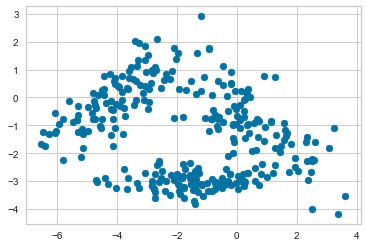

In [158]:
plt.scatter(df_new.var1, df_new.var2)

### 3

 https://www.youtube.com/watch?v=l4vTwXL_5Cc&t=12s
 <br>
 Hierarical and Agglomerative material for future use: <br>
 https://towardsdatascience.com/breaking-down-the-agglomerative-clustering-process-1c367f74c7c2

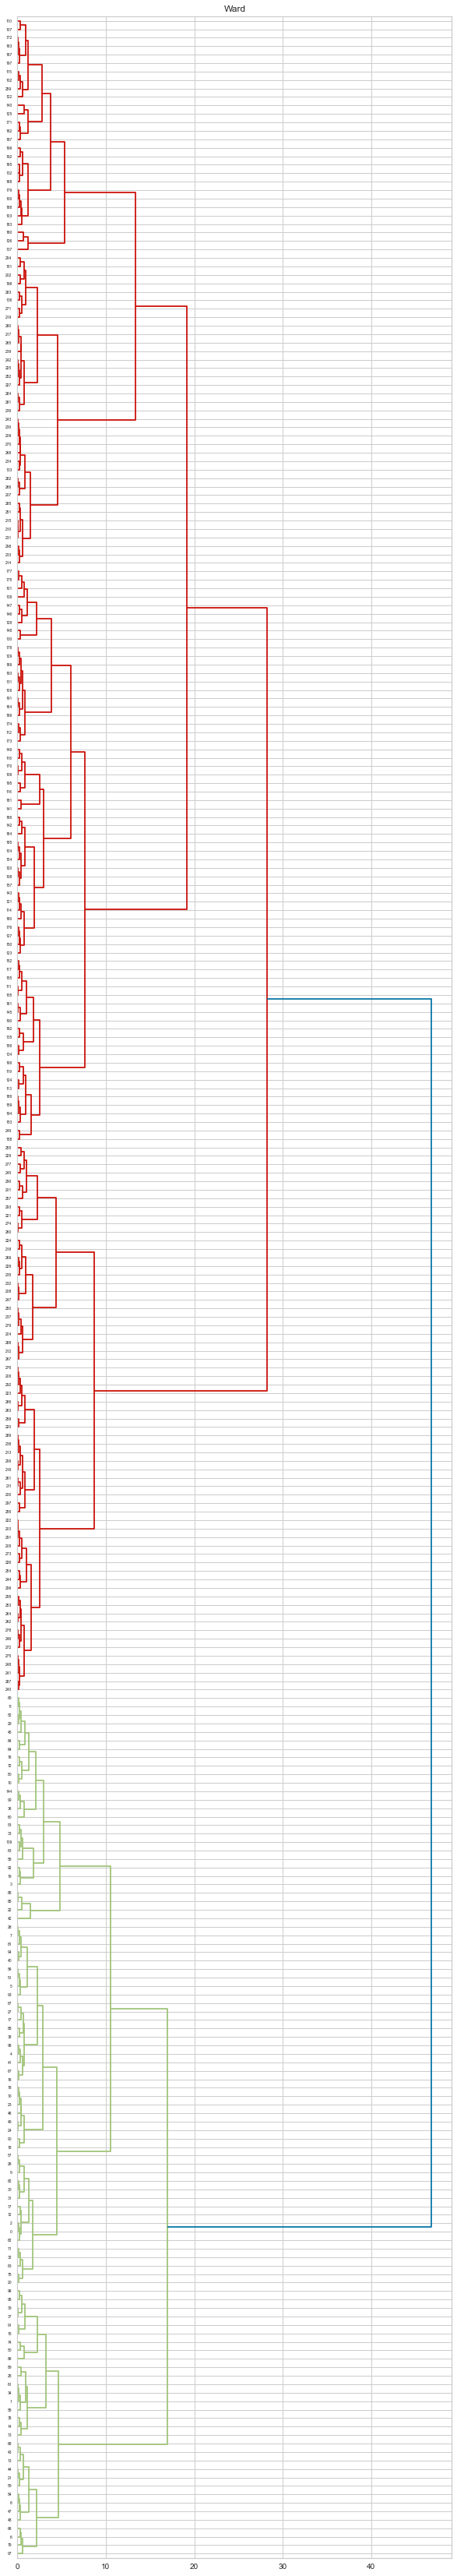

In [159]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

%matplotlib inline

algName = "AgglomerativeClustering"
labels = ('A','B','C','D','E')
Z = linkage(df_new, method='ward', metric='euclidean')
plt.figure(figsize=(10, 60))
plt.title("Ward")
R = dendrogram(Z,orientation='right')
plt.show()

### 4

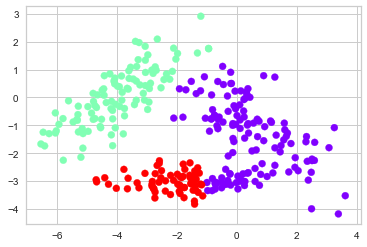

In [160]:
from sklearn.cluster import AgglomerativeClustering
aglo = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
aglo.fit_predict(df_new)
plt.scatter(df_new.var1, df_new.var2, c=aglo.labels_, cmap='rainbow')

### 5

In [161]:
#K mean clustering to find optimal clusters
from sklearn.cluster import KMeans
table = [] 
for k in range(1,10):
    kmean = KMeans(n_clusters=k, random_state=0)
    kmean.fit(df_new[['var1','var2']])
    dic={"clusters":k,
    'Inertia':kmean.inertia_}
    table.append(dic)

In [162]:
Table=pd.DataFrame(table)

Text(0, 0.5, 'Sum of sq-error')

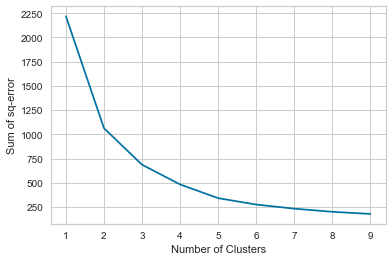

In [163]:

plt.plot(Table.clusters, Table.Inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of sq-error')

In [164]:
kmean = KMeans(n_clusters=4, random_state=0)
y_predicted = kmean.fit_predict(df_new[['var1','var2']])
df_new['cluster']=y_predicted

In [165]:
print('Centroids of clusters are: ',kmean.cluster_centers_)

Centroids of clusters are:  [[-0.5823526   0.03485511]
 [ 1.13031173 -2.21168224]
 [-4.21242174 -0.10889622]
 [-1.99659718 -3.03798974]]


In [166]:
print('The sum of sq-error within each cluster is: ',kmean.inertia_)

The sum of sq-error within each cluster is:  482.32233588724273


In [167]:
print('The cluster labels are:\n',kmean.labels_)

The cluster labels are:
 [2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 0 2 2 2 2 2 2 2 2 2 2 0 2 2 2
 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 0 2 2 2 2 2 2 2 1 0 1 1 0 0 0 1 0 0 1
 0 0 1 0 1 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 0 1 1 1 1 1 1 0 0 1 0 0 0 2 1 0 0
 0 0 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 1 0
 0 0 1 1 0 1 0 1 0 0 0 1 1 1 1 3 3 1 3 3 3 3 1 3 3 3 3 3 3 3 3 3 1 3 1 3 3
 3 3 3 1 3 1 3 3 3 3 3 3 1 3 1 3 3 1 3 3 1 3 3 3 3 3 3 1 3 3 1 3 3 3 3 3 3
 1 3 3 3 3 3 1 1 3 3 3 3 1 3 3 3 3 3 3 3 3 1 1 1 1 1 3 3 3 3 3 3 3 3 3 1 3
 3 3 3 3]


In [168]:
from collections import Counter
cl_size=Counter(kmean.labels_)
print('Sizes:',cl_size)

Sizes: Counter({2: 92, 3: 78, 1: 67, 0: 63})


### 6

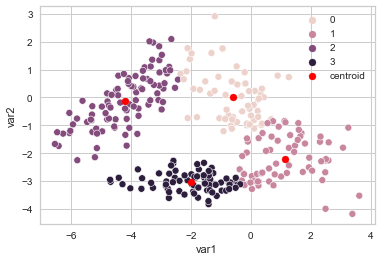

In [169]:
sns.scatterplot(data=df_new, x="var1", y="var2", hue=kmean.labels_)
plt.scatter(kmean.cluster_centers_[:,0],kmean.cluster_centers_[:,1],marker='o',color='red',label='centroid')
plt.legend()
plt.show()

### 7 

In [170]:

scaler = MinMaxScaler()

scaler.fit(df_new[['var2']])
df_new_s=df_new.copy(deep=True)
df_new_s['var2'] = scaler.transform(df_new[['var2']])
scaler.fit(df_new[["var1"]])
df_new_s['var1'] = scaler.transform(df_new[["var1"]])

y_predicted_scaled = kmean.fit_predict(df_new_s[['var1','var2']])
#print(y_predicted)
df_new['cluster']=y_predicted
print('The sum of the inertia within each cluster is ',kmean.inertia_)
print(' MinMaxScaler reduced inertia from 482.322 to 6.475')

The sum of the inertia within each cluster is  6.475066607558157
 MinMaxScaler reduced inertia from 482.322 to 6.475
